<a href="https://colab.research.google.com/github/Elaine2211/CNN/blob/master/VGG16_Cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving cat-and-dog .zip to cat-and-dog .zip


The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [0]:
import zipfile
import io
zip_ref=zipfile.ZipFile(io.BytesIO(uploaded['cat-and-dog .zip']), 'r')
zip_ref.extractall('cat-and-dog')
zip_ref.close()


The contents of the .zip are extracted to the base directory `cat-and-dog.zip`, which in turn each contain `cat` and `dog` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. If you remember with the handwriting example earlier, we had labelled 'this is a 1', 'this is a 7' etc.  Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

Let's define each of these directories:

In [0]:
# Directory with our training cat pictures
import os
train_cat_dir = os.path.join('cat-and-dog/training_set/training_set/cats')

# Directory with our training dog pictures
train_dog_dir = os.path.join('cat-and-dog/training_set/training_set/dogs')
# Directory with our training cat pictures
validation_horse_dir = os.path.join('cat-and-dog/test_set/test_set/cats')

# Directory with our training dog pictures
validation_human_dir = os.path.join('cat-and-dog/test_set/test_set/dogs')

Now, let's see what the filenames look like in the `cat` and `dog` training directories:

In [0]:
train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

['cat.485.jpg', 'cat.3996.jpg', 'cat.1148.jpg', 'cat.3836.jpg', 'cat.3330.jpg', 'cat.755.jpg', 'cat.2151.jpg', 'cat.1643.jpg', 'cat.432.jpg', 'cat.2444.jpg']
['dog.660.jpg', 'dog.3154.jpg', 'dog.892.jpg', 'dog.3029.jpg', 'dog.3780.jpg', 'dog.543.jpg', 'dog.1843.jpg', 'dog.1059.jpg', 'dog.2203.jpg', 'dog.2052.jpg']


In [0]:
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total training dog images:', len(os.listdir(train_dog_dir)))

total training cat images: 4001
total training dog images: 4006


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

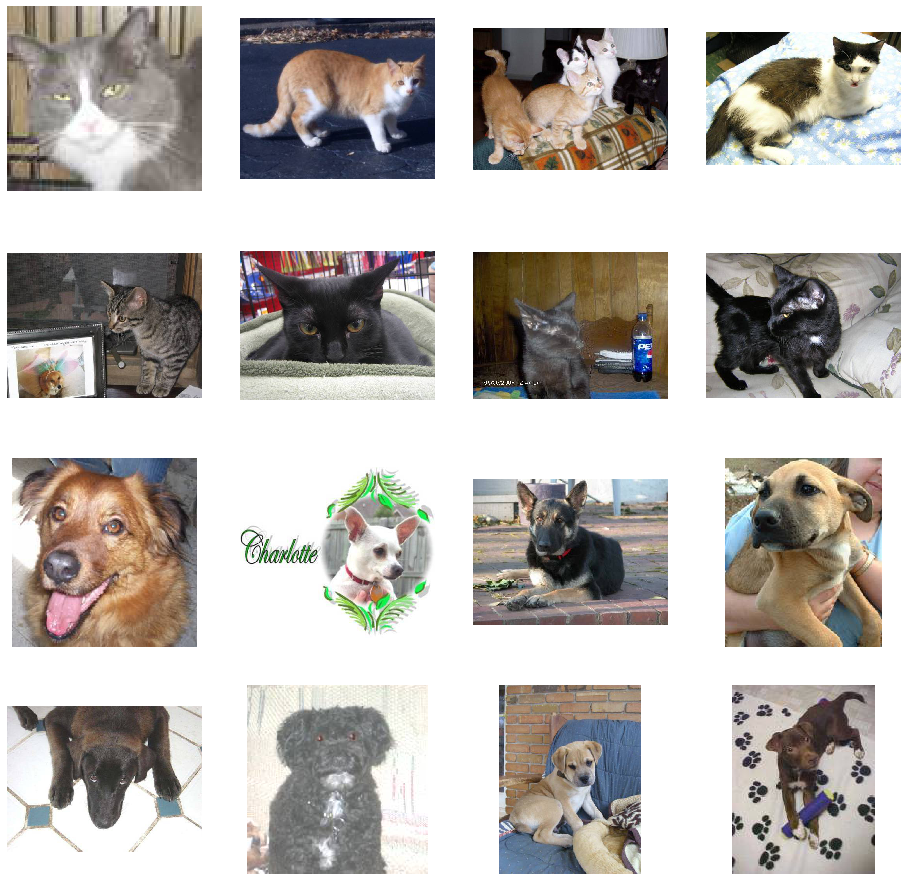

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import libraries.

In [0]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


Then we build the structure of the model. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [0]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'cat-and-dog/training_set/training_set',  # This is the source directory for training images
        target_size=(224,224),  # All images will be resized to 224*224
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'cat-and-dog/test_set/test_set',  # This is the source directory for training images
        target_size=(224,224),  # All images will be resized to 224x224
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Training
Let's train for 20 epochs -- this may take half an hour to run.

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. 

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=10,callbacks=[checkpoint,early])




Epoch 1/20





100/100 [==============================] - 233s 2s/step - loss: 0.6940 - acc: 0.4924 - val_loss: 0.6932 - val_acc: 0.4750

Epoch 00001: val_acc improved from -inf to 0.47500, saving model to vgg16_2.h5
Epoch 2/20
100/100 [==============================] - 181s 2s/step - loss: 0.6932 - acc: 0.5038 - val_loss: 0.6930 - val_acc: 0.5375

Epoch 00002: val_acc improved from 0.47500 to 0.53750, saving model to vgg16_2.h5
Epoch 3/20
100/100 [==============================] - 182s 2s/step - loss: 0.6932 - acc: 0.4968 - val_loss: 0.6931 - val_acc: 0.5125

Epoch 00003: val_acc did not improve from 0.53750
Epoch 4/20
100/100 [==============================] - 180s 2s/step - loss: 0.6932 - acc: 0.4981 - val_loss: 0.6931 - val_acc: 0.5312

Epoch 00004: val_acc did not improve from 0.53750
Epoch 5/20
100/100 [==============================] - 182s 2s/step - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6932 - val_acc: 0.4844

Epoch 00005: val_acc did not improve from 0.53750
Epoch 6/20
